# Description
Hello, My name is Ihsan.<br>
This is my second notebook. In this notebook, I prepared for Linear Regression but While I prepare the Linear Regression model, I want to do EDA. This notebook has EDA and Linear Regression models. I explained what I did in the notebook. I am learning machine learning newly and I am making projects about machine learning models. If I make a mistake please warn me in the comment. I am ready to improve myself through all comments and new technologies about machine learning and deep learning. I will be waiting for your advice. <br>
[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/shubham1kumar/usedcar-data) <br>
My Notebooks:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)

# Contents
- [Data Review](#1)<br>
- [Visualization](#2)
- [Simple Linear Regression](#3)
- [Multiple Linear Regression](#4)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usedcar-data/CarDetails_DataDescription.docx
/kaggle/input/usedcar-data/UserCarData.csv


# Dataset Review (EDA)<a id="1"></a>

In [2]:
# Reading Date with Pandas Libs.
data = pd.read_csv("/kaggle/input/usedcar-data/UserCarData.csv")

In [3]:
# Data
data

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N
7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N
7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N


In [4]:
# Data Top Ten Values
data.head(10)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
5,6,Hyundai,2017,440000,45000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5,Y
6,7,Maruti,2007,96000,175000,West,California,Los Angeles,LPG,Individual,Manual,First_Owner,17.30,1061,57.50,"7.8@ 4,500(kgm@ rpm)",5,Y
7,8,Maruti,2001,45000,5000,West,California,Los Angeles,Petrol,Individual,Manual,Second_Owner,16.10,796,37.00,59Nm@ 2500rpm,4,Y
8,9,Toyota,2011,350000,90000,West,California,Los Angeles,Diesel,Individual,Manual,First_Owner,23.59,1364,67.10,170Nm@ 1800-2400rpm,5,Y
9,10,Ford,2013,200000,169000,Central,Texas,Houston,Diesel,Individual,Manual,First_Owner,20.00,1399,68.10,160Nm@ 2000rpm,5,Y


In [5]:
# İnformation of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

In [6]:
# Dataset Values(Max, min, std...)
data.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [7]:
# Dataset Correlation: Relationship between columns
data.corr()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
Sales_ID,1.000000,-0.001304,-0.012125,0.009556,0.028627,-0.011279,-0.003717,-0.014154
year,-0.001304,1.000000,0.412302,-0.428548,0.328544,0.018263,0.226598,-0.007923
selling_price,-0.012125,0.412302,1.000000,-0.222158,-0.126280,0.455682,0.749674,0.041617
km_driven,0.009556,-0.428548,-0.222158,1.000000,-0.172980,0.206031,-0.038159,0.227259
mileage,0.028627,0.328544,-0.126280,-0.172980,1.000000,-0.576408,-0.374621,-0.451700
engine,-0.011279,0.018263,0.455682,0.206031,-0.576408,1.000000,0.703975,0.611103
max_power,-0.003717,0.226598,0.749674,-0.038159,-0.374621,0.703975,1.000000,0.191999
seats,-0.014154,-0.007923,0.041617,0.227259,-0.451700,0.611103,0.191999,1.000000


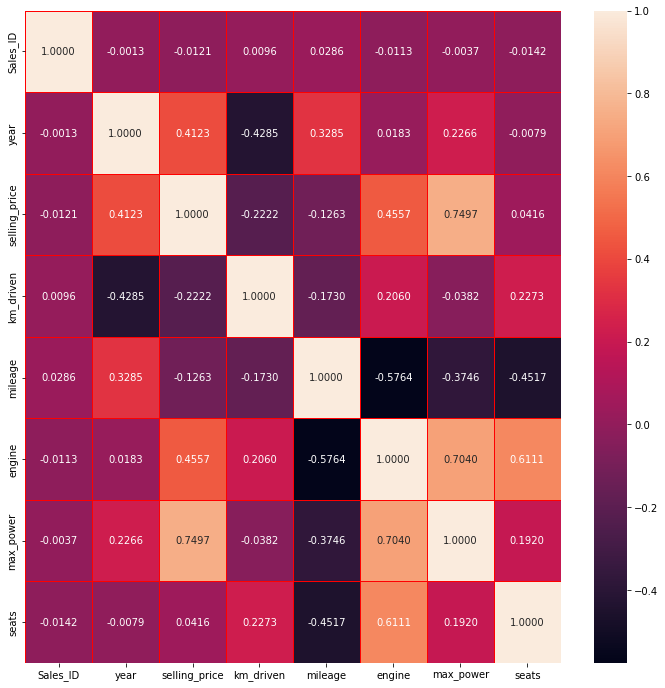

In [8]:
# Visualization of correlation results with seaborn library heatmap.
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="red",fmt=".4f",ax=ax)
plt.show()

<Figure size 720x720 with 0 Axes>

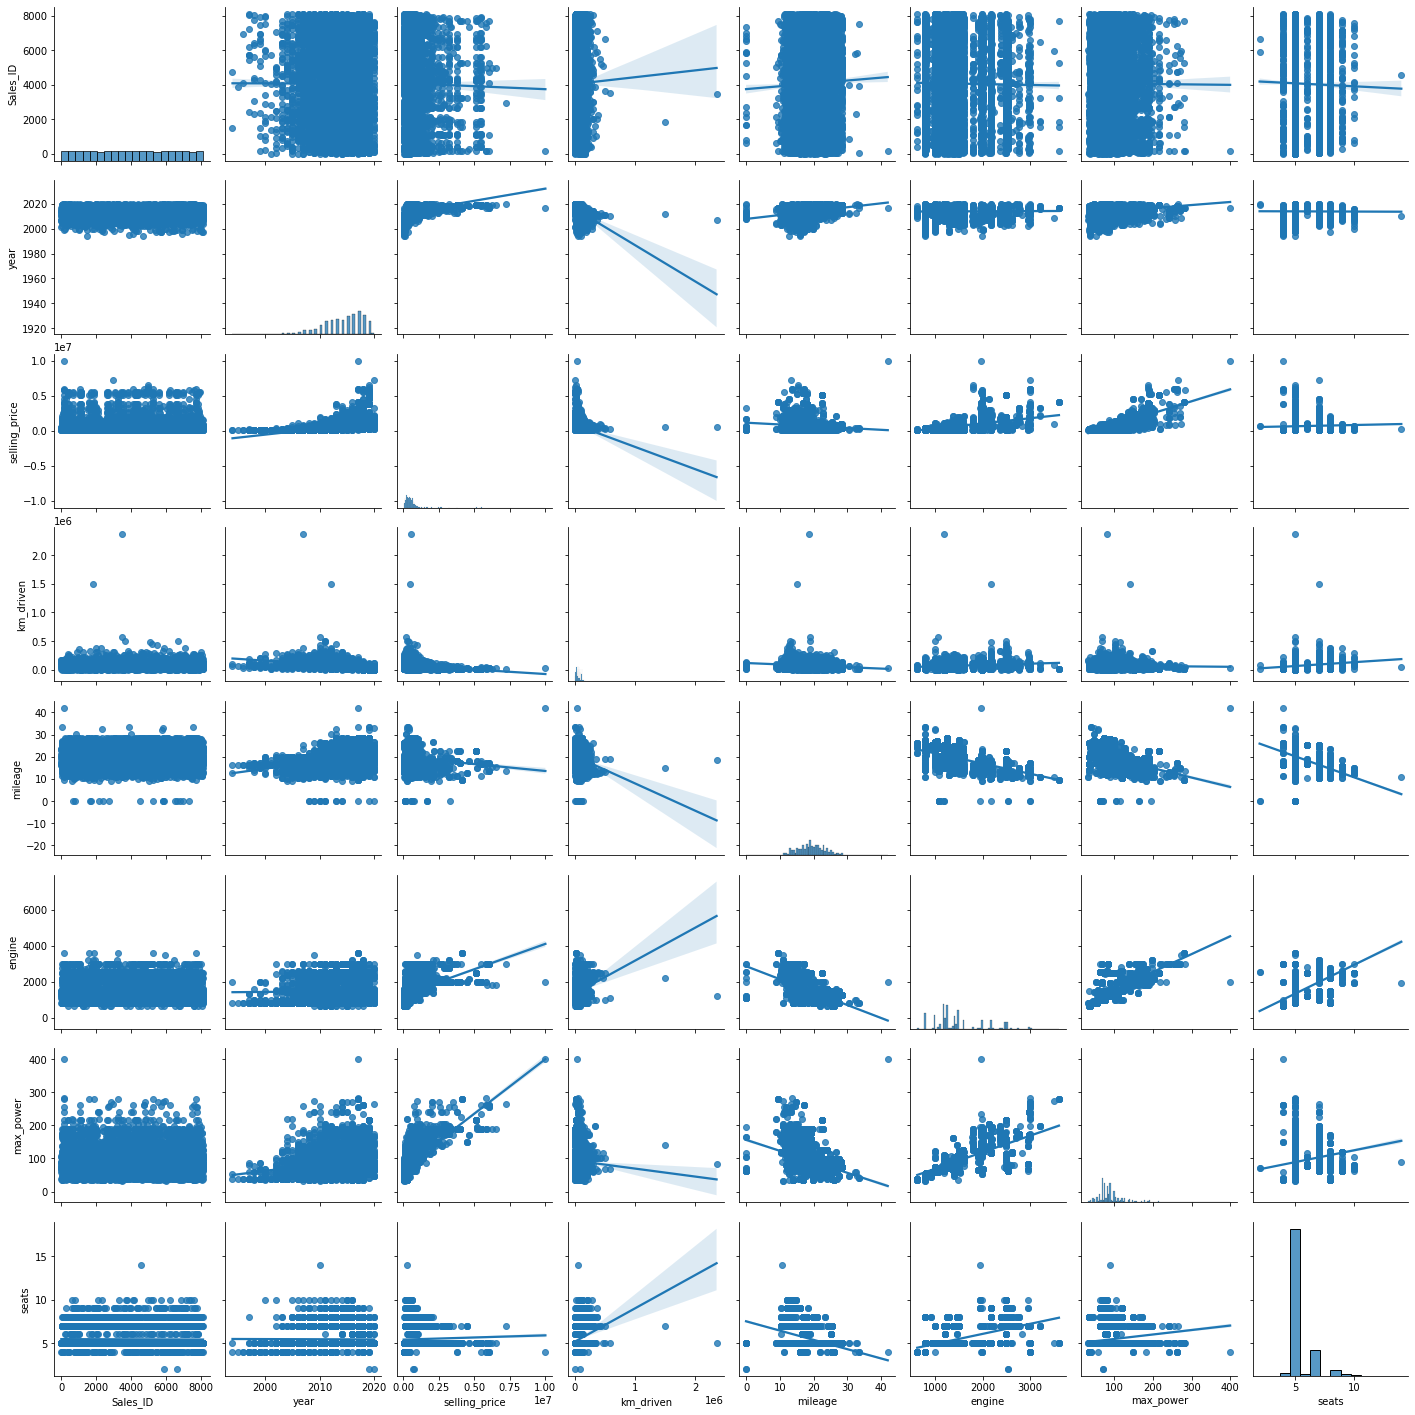

In [9]:
# Visualization of correlation results with seaborn library pairplot.
plt.figure(figsize=(10,10))
sns.pairplot(data, kind="reg")
plt.show()

In [10]:
# Dataset Columns Names
data.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')


**Review Columns** <br>
I am reviewing columns of data. I am looking at data frequency in columns of data.


**Code Description** <a id= 'vc'></a>
- data["name"].value_counts(dropna=False)
    - This code sorts the data in the name column from largest to smallest.

In [11]:
# The number of car brands in the dataset!
data["name"].value_counts(dropna=False)

Maruti        2367
Hyundai       1360
Mahindra       758
Tata           719
Honda          466
Toyota         452
Ford           388
Chevrolet      230
Renault        228
Volkswagen     185
BMW            118
Skoda          104
Nissan          81
Jaguar          71
Volvo           67
Datsun          65
Mercedes        54
Fiat            41
Audi            40
Lexus           34
Jeep            31
Mitsubishi      14
Force            6
Land             6
Isuzu            5
Kia              4
Ambassador       4
Daewoo           3
MG               3
Ashok            1
Opel             1
Name: name, dtype: int64

**Code Description**
- dataName = data["name"].value_counts(dropna=False)<br>
  dataNamedf = np.array(dataName)<br>
  x = list(dataNamedf)<br>
  y = data.name.value_counts().index
  - I am getting the x value and the y value with this code.
  - X is the data of x axis.(Name of Car)
  - Y is the data of y axis.(Number)
                       

- plt.figure(figsize=(25,15))<br>
  sns.barplot(x = y,y = x,palette=sns.cubehelix_palette(len(x)))<br>
  plt.xlabel("Name of Car")<br>
  plt.ylabel("Number")<br>
  plt.title("The Number Of Car in Data")<br>
  plt.show()
  - I am visualizing to data with this code.

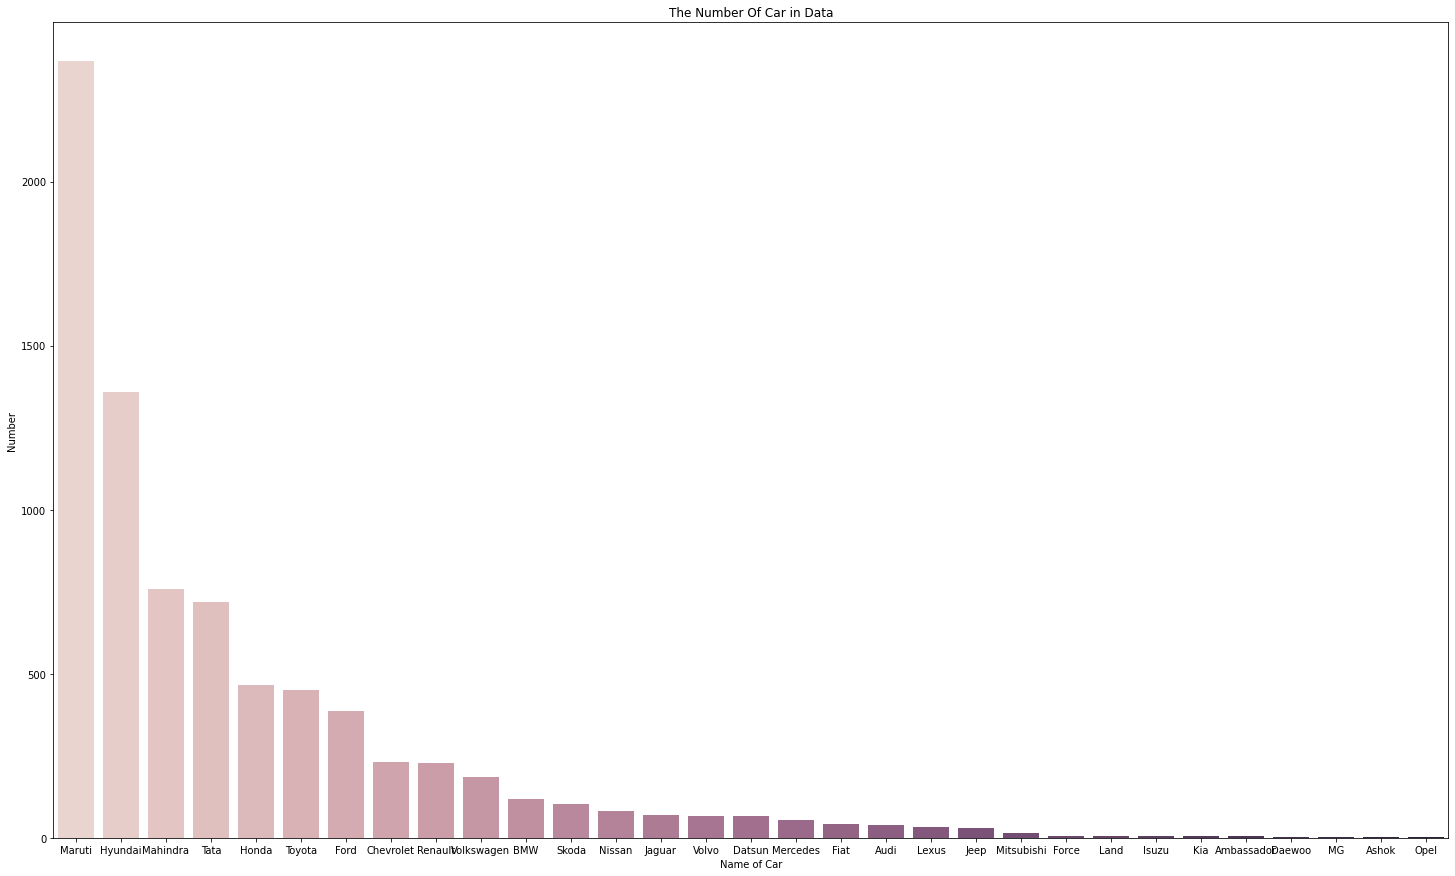

In [12]:
# I visualized the number of car brands in the dataset!
dataName = data["name"].value_counts(dropna=False)
dataNamedf = np.array(dataName)
x = list(dataNamedf)
y = data.name.value_counts().index
                       

plt.figure(figsize=(25,15))
sns.barplot(x = y,y = x,palette=sns.cubehelix_palette(len(x)))
plt.xlabel("Name of Car")
plt.ylabel("Number")
plt.title("The Number Of Car in Data")
plt.show()


In [13]:
# The number of car fuel types in the dataset!
data["fuel"].value_counts(dropna=False)

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

**Code Description**
- I explained the code above. [If want to learn how this works click here](#vc)

- dataflue = data["fuel"].value_counts(dropna=False)<br>
  datafluedf = np.array(dataflue)<br>
  x = list(datafluedf)
  - I'm getting the data that I'm going to visualize.

- labels = data.fuel.value_counts().index<br>
  sizes = x<br>
  explode = [0,0,0,0]  # only "explode" the 2nd slice (i.e. 'Hogs')
  - I'm getting names that I'm going to use.

- plt.figure(figsize=(10,10))<br>
  plt.pie(sizes,explode=explode,labels=labels,autopct="%1.1f%%")<br>
  plt.title('Car Ratios in The Dataset ',color = 'blue',fontsize = 20)<br>
  plt.show()
  - I am visualizing to data with this code.

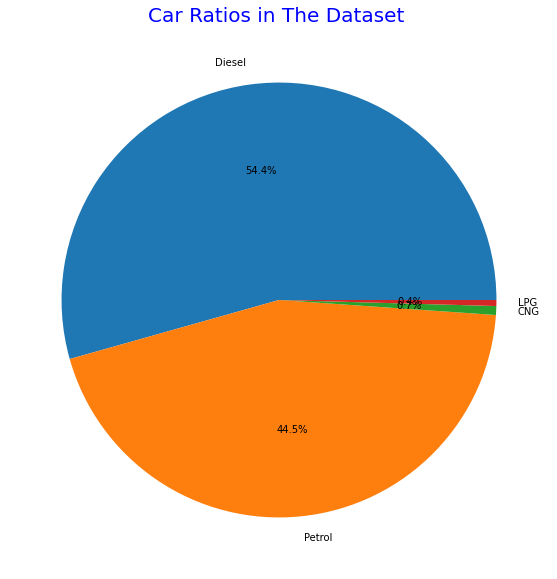

In [14]:
# I visualized the number of car fuel types in the dataset!

dataflue = data["fuel"].value_counts(dropna=False)
datafluedf = np.array(dataflue)
x = list(datafluedf)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data.fuel.value_counts().index
sizes = x
explode = [0,0,0,0] 

plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,labels=labels,autopct="%1.1f%%")
plt.title('Car Ratios in The Dataset ',color = 'blue',fontsize = 20)
plt.show()

**Code Description**
- sns.countplot(x="seller_type", data=data)
  - I am visualizing to data with this code.
- data.loc[:,'seller_type'].value_counts()
  - I am looking at the value number of seller types.

Individual          6563
Dealer              1107
Trustmark_Dealer     236
Name: seller_type, dtype: int64

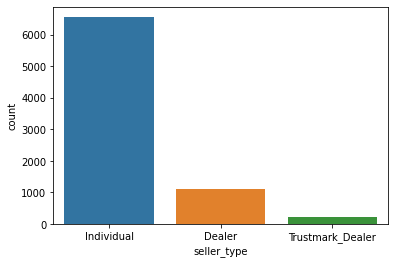

In [15]:
# The number of seller types in the dataset and its graphic.
sns.countplot(x="seller_type", data=data)
data.loc[:,'seller_type'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

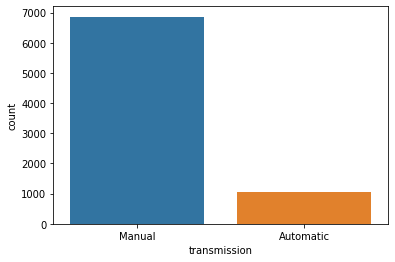

In [16]:
# The number of transmission in the dataset and its graphic.
sns.countplot(x="transmission", data=data)
data.loc[:,'transmission'].value_counts()

First_Owner           5215
Second_Owner          2016
Third_Owner            510
Fourth_Above_Owner     160
Test_Drive_Car           5
Name: owner, dtype: int64

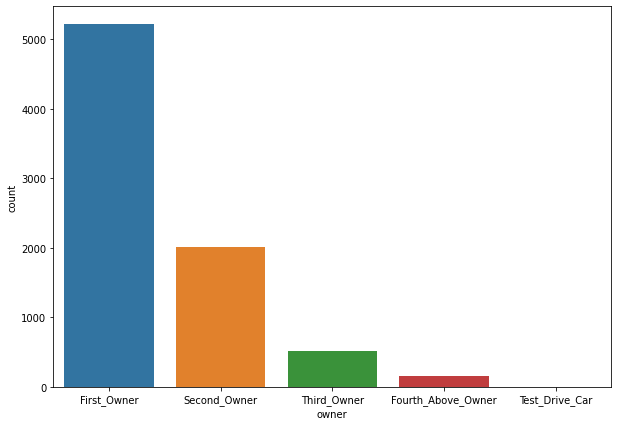

In [17]:
# The number of owner in the dataset and its graphic.
plt.figure(figsize=(10,7))
sns.countplot(x="owner", data=data)
data.loc[:,'owner'].value_counts()

2017    1010
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     583
2011     570
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      15
1999      14
1998       9
1997       9
2001       6
1994       2
1996       2
1995       1
Name: year, dtype: int64

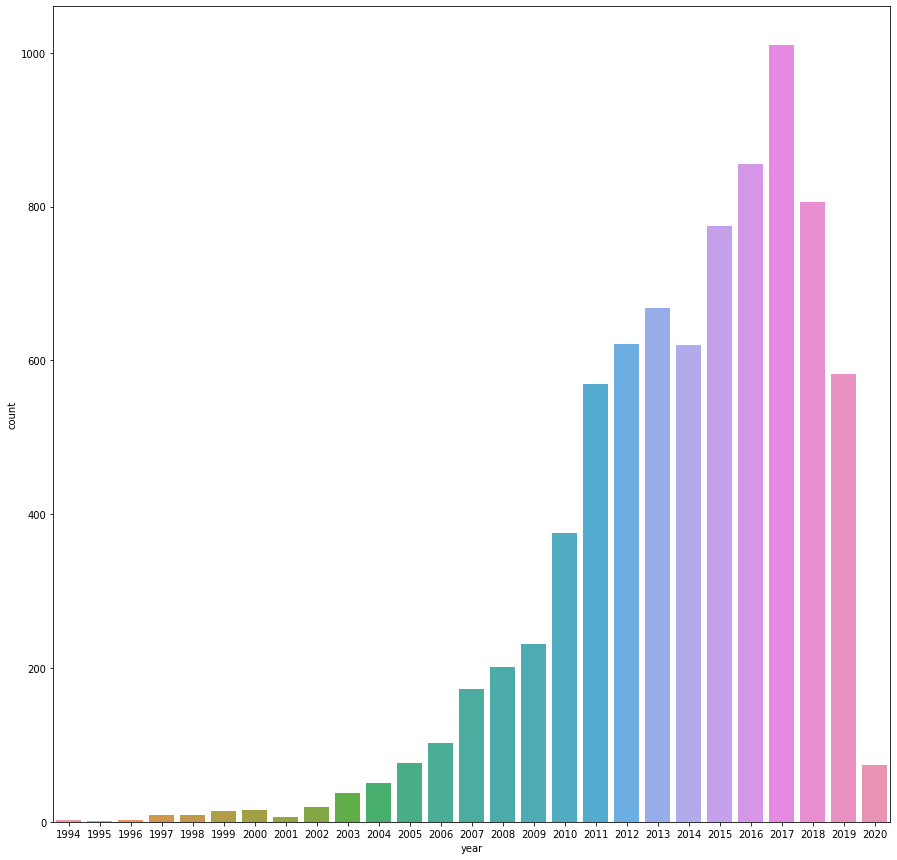

In [18]:
# The number of car's years in the dataset and its graphic.
plt.figure(figsize=(15,15))
sns.countplot(x="year", data=data)
data.loc[:,'year'].value_counts()

I looked at data frequency in columns of data. I think this parth can give us new ideas. That's why I try to look at these in every dataset I review. But I target I make a Machine Learning Project. That's why I made this part for EDA.

**Most** <br>
The Most Part, my goal is to see the data with the most points. The codes sort the data from bigger to smaller.

In [19]:
# Top ten most expensive cars
data.sort_values("selling_price", ascending=False).head(10)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
164,171,Volvo,2017,10000000,30000,East,New York,New York City,Petrol,Individual,Automatic,First_Owner,42.00,1969,400.00,640Nm@ 1740rpm,4,Y
2846,2939,BMW,2020,7200000,5000,South,Florida,Palm Beach Gardens,Diesel,Individual,Automatic,First_Owner,13.38,2993,265.00,620Nm@ 1500-2500rpm,7,N
4813,4953,Audi,2019,6523000,23600,Central,Missouri,Saint Peters,Petrol,Dealer,Automatic,Test_Drive_Car,15.26,1798,187.74,320Nm@ 1400-4100rpm,5,N
4811,4951,Audi,2019,6223000,7800,Central,Missouri,Saint Peters,Petrol,Dealer,Automatic,Test_Drive_Car,15.26,1798,187.74,320Nm@ 1400-4100rpm,5,N
1040,1072,BMW,2018,6000000,28156,Central,Iowa,Ankeny,Diesel,Dealer,Automatic,First_Owner,17.09,2993,261.40,620Nm@ 2000-2500rpm,4,Y
4630,4767,BMW,2018,6000000,27000,South,Florida,North Port,Diesel,Dealer,Automatic,First_Owner,17.09,2993,261.40,620Nm@ 2000-2500rpm,4,N
5114,5259,Mercedes,2017,6000000,37000,South,Louisiana,Baton Rouge,Diesel,Dealer,Automatic,First_Owner,13.50,2987,254.79,620Nm@ 1600-2400rpm,5,N
131,137,Mercedes,2017,6000000,37000,West,California,Los Angeles,Diesel,Dealer,Automatic,First_Owner,13.50,2987,254.79,620Nm@ 1600-2400rpm,5,Y
3978,4102,BMW,2018,6000000,28156,South,Virginia,Suffolk,Diesel,Dealer,Automatic,First_Owner,17.09,2993,261.40,620Nm@ 2000-2500rpm,4,N
7498,7714,Mercedes,2017,6000000,37000,West,Montana,Butte,Diesel,Dealer,Automatic,First_Owner,13.50,2987,254.79,620Nm@ 1600-2400rpm,5,N


In [20]:
# Our top ten cars with the most kilometers
data.sort_values("km_driven", ascending=False).head(10)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
3377,3487,Hyundai,2007,550000,2360457,South,Mississippi,Clinton,Petrol,Individual,Manual,Second_Owner,18.60,1197,81.83,114.7Nm@ 4000rpm,5,N
1757,1811,Mahindra,2012,500000,1500000,Central,Illinois,West Chicago,Diesel,Individual,Manual,First_Owner,15.10,2179,140.00,330Nm@ 1600-2800rpm,7,Y
3399,3509,Maruti,2010,194000,577414,South,Tennessee,Columbia,Petrol,Individual,Manual,Second_Owner,18.90,1061,67.00,84Nm@ 3500rpm,5,N
3528,3642,Maruti,2011,229999,500000,West,Colorado,Denver,Petrol,Individual,Manual,Second_Owner,18.90,998,67.10,90Nm@ 3500rpm,5,N
6488,6674,Toyota,2011,350000,500000,West,Idaho,Post Falls,Diesel,Individual,Manual,Second_Owner,12.99,2494,100.57,200Nm@ 1400-3400rpm,7,N
4962,5107,Mahindra,2011,400000,475000,East,Maryland,Middle River,Diesel,Individual,Manual,Third_Owner,13.50,2179,115.00,277.5Nm@ 1700-2200rpm,5,N
5045,5190,Toyota,2013,750000,440000,East,Pennsylvania,Altoona,Diesel,Individual,Manual,Second_Owner,12.99,2494,100.60,200Nm@ 1400-3400rpm,7,N
5313,5468,Toyota,2010,950000,426000,Central,Kansas,Emporia,Diesel,Individual,Manual,First_Owner,12.80,2494,102.00,20.4@ 1400-3400(kgm@ rpm),7,N
2202,2273,Mahindra,2010,260000,380000,East,Ohio,Willoughby,Diesel,Individual,Manual,Second_Owner,13.60,2523,63.00,180 Nm at 1440-1500rpm,7,N
6907,7103,Toyota,2007,350000,376412,Central,Michigan,Madison Heights,Diesel,Individual,Manual,Second_Owner,12.80,2494,102.00,20.4@ 1400-3400(kgm@ rpm),8,N


In [21]:
# Top ten vehicles with the highest engine rating
data.sort_values("engine", ascending=False).head(10)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
129,135,Jeep,2017,4100000,17000,West,California,Los Angeles,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,Y
7488,7704,Jeep,2017,4100000,17000,South,Florida,Pembroke Pines,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,N
3139,3240,Jeep,2017,4100000,17000,West,Idaho,Pocatello,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,N
1516,1565,Jeep,2017,4100000,17000,West,Idaho,Lewiston,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,Y
1806,1861,Jeep,2017,4100000,17000,East,New York,Auburn,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,Y
5104,5249,Jeep,2017,4100000,17000,South,Louisiana,Bossier City,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,N
5793,5963,Mercedes,2009,1000000,80000,Central,Michigan,Lincoln Park,Petrol,Individual,Automatic,Third_Owner,10.93,3498,272.0,355Nm@ 4500rpm,5,N
3114,3215,Ford,2016,2100000,80000,Central,Kansas,Manhattan,Diesel,Individual,Automatic,First_Owner,10.91,3198,197.0,470Nm@ 1750-2500rpm,7,N
1868,1924,Ford,2016,2280000,120000,Central,Minnesota,Minneapolis,Diesel,Individual,Automatic,Second_Owner,10.91,3198,197.0,470Nm@ 1750-2500rpm,7,Y
6288,6469,Ford,2018,3200000,35000,South,Florida,Land O Lakes,Diesel,Individual,Automatic,First_Owner,10.91,3198,197.0,470Nm@ 1750-2500rpm,7,N


In [22]:
# Top ten vehicles with the highest max_power score
data.sort_values("max_power", ascending=False).head(10)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
164,171,Volvo,2017,10000000,30000,East,New York,New York City,Petrol,Individual,Automatic,First_Owner,42.00,1969,400.0,640Nm@ 1740rpm,4,Y
142,149,Mercedes,2017,5850000,47000,West,California,Los Angeles,Diesel,Dealer,Automatic,First_Owner,13.50,2987,282.0,490Nm@ 1600rpm,5,Y
129,135,Jeep,2017,4100000,17000,West,California,Los Angeles,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,Y
1516,1565,Jeep,2017,4100000,17000,West,Idaho,Lewiston,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,Y
3139,3240,Jeep,2017,4100000,17000,West,Idaho,Pocatello,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,N
1806,1861,Jeep,2017,4100000,17000,East,New York,Auburn,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,Y
5104,5249,Jeep,2017,4100000,17000,South,Louisiana,Bossier City,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,N
7488,7704,Jeep,2017,4100000,17000,South,Florida,Pembroke Pines,Petrol,Individual,Automatic,First_Owner,9.50,3604,280.0,347Nm@ 4300rpm,5,N
5793,5963,Mercedes,2009,1000000,80000,Central,Michigan,Lincoln Park,Petrol,Individual,Automatic,Third_Owner,10.93,3498,272.0,355Nm@ 4500rpm,5,N
5657,5824,Jaguar,2016,3500000,35000,Central,Indiana,Vincennes,Diesel,Individual,Automatic,First_Owner,14.74,2993,270.9,600Nm@ 2000rpm,5,N


In [23]:
# Top ten cars with the most seats
data.sort_values("seats", ascending=False).head(10)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
4441,4576,Tata,2010,235000,50000,East,Ohio,Toledo,Diesel,Individual,Manual,First_Owner,10.71,1948,90.0,190Nm@ 2000-3000rpm,14,N
5550,5713,Chevrolet,2009,295000,195000,Central,Michigan,East Lansing,Diesel,Individual,Manual,Second_Owner,14.80,2499,80.0,"19@ 1,800(kgm@ rpm)",10,N
4857,4999,Toyota,2002,229999,290000,West,California,Twentynine Palms,Diesel,Individual,Manual,First_Owner,13.10,2446,75.0,151Nm@ 2400rpm,10,N
6956,7153,Chevrolet,2015,509999,197000,East,Ohio,Medina,Diesel,Individual,Manual,First_Owner,13.58,2499,72.4,171Nm@ 1800rpm,10,N
5021,5166,Tata,2007,100000,120000,East,Ohio,Whitehall,Diesel,Individual,Manual,Third_Owner,14.60,2956,63.0,"18@ 1,600-2,200(kgm@ rpm)",10,N
5098,5243,Tata,2008,200000,80000,Central,Michigan,Lansing,Diesel,Individual,Manual,First_Owner,12.20,1948,68.0,"115@ 2,500(kgm@ rpm)",10,N
2025,2087,Tata,2012,200000,67500,South,Kentucky,Danville,Diesel,Individual,Manual,First_Owner,12.20,1948,68.0,"115@ 2,500(kgm@ rpm)",10,N
2257,2332,Chevrolet,2014,600000,110000,East,Pennsylvania,Erie,Diesel,Individual,Manual,First_Owner,13.58,2499,72.4,171Nm@ 1800rpm,10,N
3599,3715,Chevrolet,2005,160000,220000,West,California,Laguna Hills,Diesel,Individual,Manual,First_Owner,14.80,2499,80.0,"19@ 1,800(kgm@ rpm)",10,N
6046,6220,Chevrolet,2011,350000,120000,Central,Illinois,Lansing,Diesel,Individual,Manual,Second_Owner,12.20,2499,80.0,"19@ 1,800(kgm@ rpm)",10,N


# Visualization <a id="2"></a>
In this section, I target to visualize the data and I will look to relation between columns. These relations will give us proper data for the Linear regression model. The proper data, It have a linear relationship between the data of the two columns. In a linear relationship, when one value changes by a fixed amount, the other also changes by a fixed amount. <br>
**Linear relationship graph**                                            
![Linear Relationship](https://profferings.ca/tutorials/mathematical-relationships/course/en/assets/4fc7a9dd098f9a1ab54cbeab6cdd9c70847eda92.jpg)

In [24]:
# Reading Date with Pandas Libs.
data_1 = pd.read_csv("/kaggle/input/usedcar-data/UserCarData.csv")
data_1

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N
7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N
7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N


In [25]:
# İnformation of Data
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

**I will graph the relationship between selling_price and Km_driven.**
<a id='learn'></a>
- x = data_1['km_driven'] 
    - In this part, we specify the x-axis in our graph.
- y = data_1['selling_price']
    - In this part, we specify the y-axis in our graph.
- plt.figure(figsize=[10,10])
    - In this code, we determine the size of our graph. (10,10)
- plt.scatter(x=x,y=y) 
    - We specify the x and y axes that we have previously determined to the matplotlib(plt.scatter) library.
- plt.xlabel('selling_price')
    - Title of x-axis
- plt.ylabel('km_driven')
    - Title of y-axis
- plt.show()
    - Show


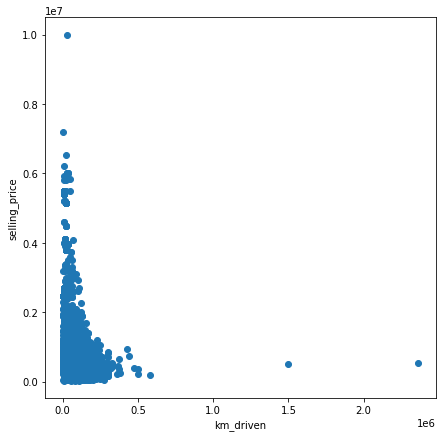

In [26]:
x = data_1['km_driven'] 
y = data_1['selling_price']
#Graph
plt.figure(figsize=[7,7]) 
plt.scatter(x=x,y=y) 
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

**Selling_price and Km_driven is my chart description.** <br>
In the chart above, I wanted to examine the effect of km on the price of the vehicle. Since the accumulation in the data is between km_driven(0.0 - 0.5) and selling_price(0.0 - 0.2), I cannot comment. but it is shown in this chart that the vehicles with the highest price are those with the lowest km.

**I will graph the relationship between selling_price and engine.** <br>
If you want to know what the codes do, please click here: [Learn](#learn)

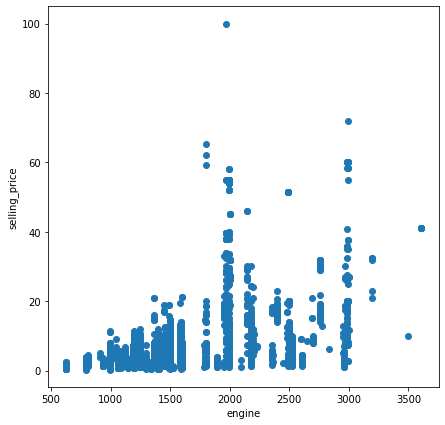

In [27]:
data_1['selling_price'] = data_1['selling_price'] / 100000 # I reduced our large data by dividing it by a hundred thousand.
x = data_1['engine'] 
y = data_1['selling_price'] 
# Graph
plt.figure(figsize=[7,7]) 
plt.scatter(x=x,y=y) 
plt.xlabel('engine')
plt.ylabel('selling_price')
plt.show()

**Selling_price and engine is my chart description.** <br>
In the chart above, we observe the effect of the vehicle's engine on the price of the vehicle and as far as we look, we see that the vehicle engine has an effect on the price. As the engine increases, there appears to be an increase in vehicle prices, but there are low-priced vehicles from every engine class.

**I will graph the relationship between selling_price and max_power.** <br>
If you want to know what the codes do, please click here: [Learn](#learn)

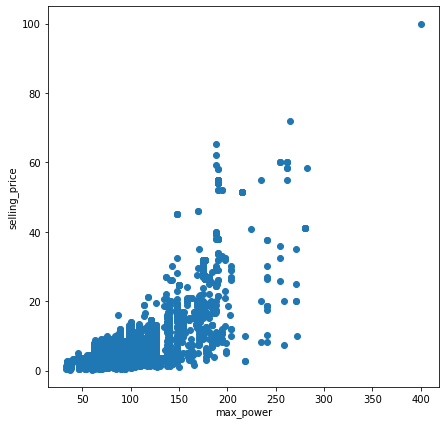

In [28]:
# data_1['selling_price'] = data_1['selling_price'] / 100000 # I reduced our large data by dividing it by a hundred thousand.
x = data_1['max_power'] 
y = data_1['selling_price'] 
# Graph
plt.figure(figsize=[7,7]) 
plt.scatter(x=x,y=y) 
plt.xlabel('max_power')
plt.ylabel('selling_price')
plt.show()

**Selling_price and engine is my chart description.** <br>
In the chart above, you can see the effect of max_power on the vehicle price. As max_power increases, there is an increase in the selling price. We can see that max_power has an effect on the vehicle price.

**I will graph the relationship between selling_price and year.** <br>
If you want to know what the codes do, please click here: [Learn](#learn)

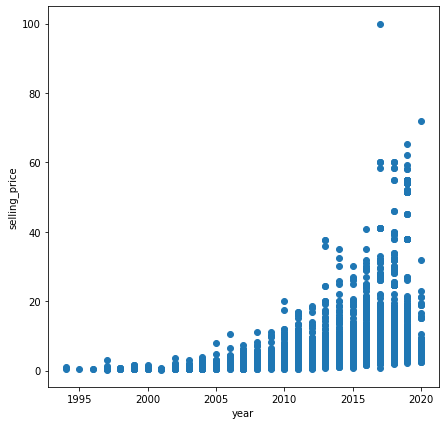

In [29]:
x = data_1['year']
y = data_1['selling_price'] 
# Graph
plt.figure(figsize=[7,7]) 
plt.scatter(x=x,y=y) 
plt.xlabel('year')
plt.ylabel('selling_price')
plt.show()

**Selling_price and year is my chart description.** <br>
The chart above shows the effect of the years of the vehicles on the price. As the years go by, there is an increase in prices, but not a big increase. Cars are available at the same price every year. The effect of vehicle production years on prices is not great.

**I will graph the relationship between engine and max_power.** <br>
If you want to know what the codes do, please click here: [Learn](#learn)

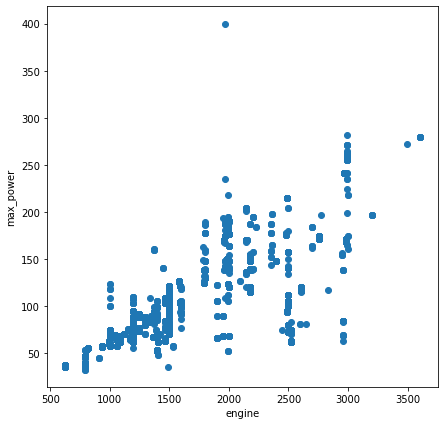

In [30]:
x = data_1['engine'] 
y = data_1['max_power'] 
# Graph
plt.figure(figsize=[7,7]) 
plt.scatter(x=x,y=y) 
plt.xlabel('engine')
plt.ylabel('max_power')
plt.show()

**Engine and max_power is my chart description.**<br>
In the chart above, we observe the relationship between engine and max_power. There seems to be an increase in the right proportion between the two. I will use this relationship between engine and max_power for the Linear Regression models.

# Simple Linear Regression <a id="3"></a>

N    5906
Y    2000
Name: sold, dtype: int64

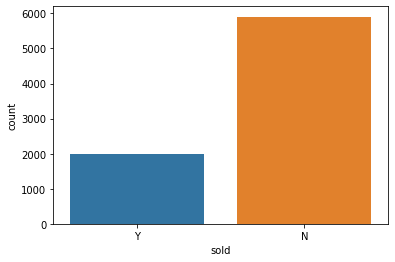

In [31]:
# The number of sold in the dataset and its graphic.
sns.countplot(x="sold", data=data)
data.loc[:,'sold'].value_counts()

In Simple Linear Regression there needs to be a linear increase between two variables that is, when the x variable increases linearly, the y variable also increases depending on x. I am taking two variables here, one is engine x variable is an independent variable, max_power y variable is x dependent variable. I am applying Simple Linear Regression to these variables that I have chosen.

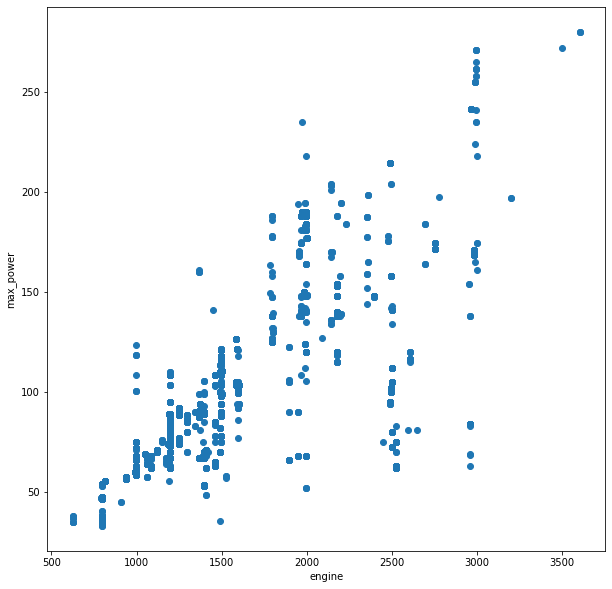

In [32]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['sold'] =='N'] # Y: sold N: not sold, We have two different classes, we chose vehicles that are not sold here. My reason for choosing is that there is more data.
x = np.array(data1.loc[:,'engine']).reshape(-1,1) # Independent variable
y = np.array(data1.loc[:,'max_power']).reshape(-1,1) # Dependent variable
# Graph
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('engine')
plt.ylabel('max_power')
plt.show()

In the chart above, I wanted to show the relationship between the data I will apply Linear Regression. When there is an increase in the engine value of unsold vehicles, there is also a regular increase in max_power. If you want information about the codes that I created the Chart, please [click here](#learn)

**Linear Regression Code explanations**
- from sklearn.linear_model import LinearRegression
    - Import LinearRegression
- reg = LinearRegression()
- predic_npspace = np.linspace(min(x), max(x)).reshape(-1,1)
    - We generate numbers between the smallest and largest numbers in x data.
- reg.fit(x,y)
    - Training with x values and y values
- predicted = reg.predict(predic_npspace)
    - We make predictions with the random numbers we produce.
- print("R^2 score: ",reg.score(x,y))
    - Traning Score
- I am making graph.<br>
    plt.plot(predic_npspace, predicted, color = "black", linewidth = 3) <br>
    plt.scatter(x = x, y = y) <br>
    plt.xlabel("engine") <br>
    plt.ylabel("max_power") <br>
    plt.show() <br>

R^2 score:  0.4994494459664348


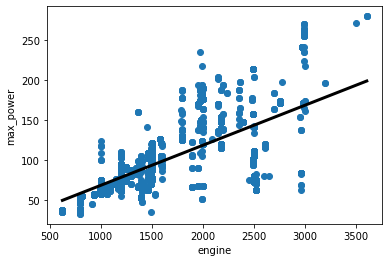

In [33]:
# Simple Linear Reegression kısmı 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Predict_space
predic_npspace = np.linspace(min(x), max(x)).reshape(-1,1)

#Fit
reg.fit(x,y)

#Predict
predicted = reg.predict(predic_npspace)

# R^2
print("R^2 score: ",reg.score(x,y))

# Plot regression line and scatter
plt.plot(predic_npspace, predicted, color = "black", linewidth = 3)
plt.scatter(x = x, y = y)
plt.xlabel("engine")
plt.ylabel("max_power")
plt.show()

In [34]:
# I'm looking at what a desired value will return.
reg.predict([[5000]])

array([[268.96017025]])

# Multiple Linear Regression <a id="4"></a>
We examined the effect of a single value x independent on the y dependent in Linear Regression. In Multiple Linear Regression, we will examine how more than one independent will affect the addict.

**Code Description**
- sdataLR = data['selling_price']
    - Selling Price is my dependent variable. I'm pulling selling_price data from our data.
- kdataLR = data["km_driven"]
    - Km Driven is my first independent variable. I'm pulling km_driven data from our data.
- edataLR = data['engine']
    - Engine is my second independent variable. I'm pulling engine data from our data.
- mdataLR = data['max_power']
    - Max Power is my third independent variable. I'm pulling max_power data from our data.

- dataLR = pd.concat([sdataLR, kdataLR, edataLR,mdataLR], axis = 1)
    - In this part, I combine the data I took and create a separate data set.

In [35]:
sdataLR = data['selling_price']
kdataLR = data["km_driven"]
edataLR = data['engine']
mdataLR = data['max_power']

dataLR = pd.concat([sdataLR, kdataLR, edataLR,mdataLR], axis = 1)
dataLR

,selling_price,km_driven,engine,max_power
0,450000,145500,1248,74.00
1,370000,120000,1498,103.52
2,158000,140000,1497,78.00
3,225000,127000,1396,90.00
4,130000,120000,1298,88.20
...,...,...,...,...
7901,320000,110000,1197,82.85
7902,135000,119000,1493,110.00
7903,382000,120000,1248,73.90
7904,290000,25000,1396,70.00


**I'm preparing our model.**
- x_data = dataLR.drop("selling_price",axis = 1)
    - There are independent values in the dataset.
- ym = dataLR.selling_price.values
    - There is dependent value in the dataset.

In [36]:
x_data = dataLR.drop("selling_price",axis = 1)
ym = dataLR.selling_price.values

In [37]:
# Independent values
x_data

,km_driven,engine,max_power
0,145500,1248,74.00
1,120000,1498,103.52
2,140000,1497,78.00
3,127000,1396,90.00
4,120000,1298,88.20
...,...,...,...
7901,110000,1197,82.85
7902,119000,1493,110.00
7903,120000,1248,73.90
7904,25000,1396,70.00


In [38]:
# Dependent value
ym

array([450000, 370000, 158000, ..., 382000, 290000, 290000])

**Code Description**
- from sklearn.linear_model import LinearRegression
    - Import Linear Regression
- reg = LinearRegression()
- reg.fit(x,y)
    - Training with x_data values and y values
- print("R^2 score: ",reg.score(x,y))
    - Traning Score

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_data,ym)

print("R^2 score: ",lr.score(x_data,ym))

R^2 score:  0.6011386487658736


In [40]:
# I'm looking at what a desired value will return.
lr.predict([[25000,1396,70]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([384096.4876355])

**Code Description**
- import warnings <br>
  warnings.filterwarnings('ignore')
  - In this section, we do not filter and show the alerts it sends back to us.
      
- predic_npspaceKM = np.linspace(min(x_data["km_driven"]), max(x_data["km_driven"]), dtype = int).reshape(-1,1)<br>
  predic_npspaceEN = np.linspace(min(x_data["engine"]), max(x_data["engine"]), dtype = int).reshape(-1,1)<br>
  predic_npspaceMA = np.linspace(min(x_data["max_power"]), max(x_data["max_power"]), dtype = int).reshape(-1,1)
  - We generate numbers between the smallest and largest numbers in datasets.
      
- lrlist = []<br>
  for i in range(0,len(predic_npspaceKM)):<br>
    lrPredictResult = lr.predict([[x_data["km_driven"][i],x_data["engine"][i],x_data["max_power"][i]]])<br>
    print("Resut: {0} - {1} - {2} : {3}".format(x_data["km_driven"][i], x_data["engine"][i], x_data["max_power"][i],lrPredictResult)
     - I am printing the results for look its.


In [41]:
import warnings
warnings.filterwarnings('ignore')

predic_npspaceKM = np.linspace(min(x_data["km_driven"]), max(x_data["km_driven"]), dtype = int).reshape(-1,1)
predic_npspaceEN = np.linspace(min(x_data["engine"]), max(x_data["engine"]), dtype = int).reshape(-1,1)
predic_npspaceMA = np.linspace(min(x_data["max_power"]), max(x_data["max_power"]), dtype = int).reshape(-1,1)

for i in range(0,len(predic_npspaceKM)):
    lrPredictResult = lr.predict([[int(predic_npspaceKM[i]),int(predic_npspaceEN[i]),int(predic_npspaceMA[i])]])
    print("Resut: index({0}) {1} - {2} - {3} : {4}".format(i,int(predic_npspaceKM[i]),
                                               int(predic_npspaceEN[i]),
                                               int(predic_npspaceMA[i]),
                                               lrPredictResult))

Resut: index(0) 1 - 624 - 32 : [-155760.44675786]
Resut: index(1) 48173 - 684 - 40 : [-142775.83509369]
Resut: index(2) 96346 - 745 - 47 : [-147754.73987103]
Resut: index(3) 144518 - 806 - 55 : [-134866.71918679]
Resut: index(4) 192691 - 867 - 62 : [-139845.62396413]
Resut: index(5) 240863 - 928 - 70 : [-126957.60327988]
Resut: index(6) 289036 - 988 - 77 : [-131839.91707729]
Resut: index(7) 337209 - 1049 - 85 : [-118954.47329909]
Resut: index(8) 385381 - 1110 - 92 : [-123930.80117039]
Resut: index(9) 433554 - 1171 - 100 : [-111045.35739219]
Resut: index(10) 481726 - 1232 - 107 : [-116021.68526349]
Resut: index(11) 529899 - 1292 - 115 : [-103039.65050536]
Resut: index(12) 578071 - 1353 - 122 : [-108015.97837665]
Resut: index(13) 626244 - 1414 - 130 : [-95130.53459845]
Resut: index(14) 674417 - 1475 - 137 : [-100109.4393758]
Resut: index(15) 722589 - 1536 - 145 : [-87221.41869155]
Resut: index(16) 770762 - 1597 - 152 : [-92200.32346889]
Resut: index(17) 818934 - 1657 - 160 : [-79215.7118

**Predict wiht Random Library**<br>
In the code above, I selected numbers in predic_npspace in order. But This time I will select the number in random. Let me see How was the result going? In the code above, I will add the random library and I will change predic_npspace.

In [42]:
import warnings
warnings.filterwarnings('ignore')

import random as rd

predic_npspaceKM = np.linspace(min(x_data["km_driven"]), max(x_data["km_driven"]), dtype = int).reshape(-1,1)
predic_npspaceEN = np.linspace(min(x_data["engine"]), max(x_data["engine"]), dtype = int).reshape(-1,1)
predic_npspaceMA = np.linspace(min(x_data["max_power"]), max(x_data["max_power"]), dtype = int).reshape(-1,1)

for i in range(0,len(predic_npspaceKM)):
    rd1 = rd.choice(predic_npspaceKM) # I select the random number with this code through predic_npspaceKM. (Changing Code)
    rd2 = rd.choice(predic_npspaceEN) # I select the random number with this code through predic_npspaceEN. (Changing Code)
    rd3 = rd.choice(predic_npspaceMA) # I select the random number with this code through predic_npspaceMA. (Changing Code)
    lrPredictResult = lr.predict([[int(rd1),int(rd2),int(rd3)]])
    print("Resut: index({0}) {1} - {2} - {3} : {4}".format( i, rd1, rd2, rd3, lrPredictResult))

Resut: index(0) [1926903] - [806] - [55] : [-4727905.39963408]
Resut: index(1) [1] - [3117] - [362] : [5498673.26360438]
Resut: index(2) [1637868] - [2387] - [317] : [544659.62127199]
Resut: index(3) [1830558] - [1110] - [32] : [-4919877.06143565]
Resut: index(4) [2215939] - [1536] - [167] : [-3542428.3922928]
Resut: index(5) [240863] - [2387] - [85] : [81.38533482]
Resut: index(6) [1011625] - [806] - [197] : [167417.5060156]
Resut: index(7) [1589695] - [1901] - [227] : [-892051.2375902]
Resut: index(8) [1541523] - [684] - [175] : [-1579311.42191875]
Resut: index(9) [722589] - [1171] - [325] : [3163617.0289805]
Resut: index(10) [240863] - [928] - [265] : [3356590.3650507]
Resut: index(11) [2360457] - [3117] - [325] : [-1244980.96755227]
Resut: index(12) [1830558] - [1779] - [355] : [785688.15643081]
Resut: index(13) [1011625] - [1475] - [32] : [-2844819.37122216]
Resut: index(14) [1204315] - [3239] - [227] : [-28201.91723819]
Resut: index(15) [192691] - [1353] - [325] : [4511534.829897

# CONCLUSION
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.